In [ ]:
# Kelompok 1
# Nama Anggota
# 1. NANDA PUTRI RAHMAWATI (2011016320021)
# 2. HELMA MUKIMAH (2211016220008)
# 3. NORKHADIJAH (2211016220030)
# 4. FAUZAN SAPUTRA (2211016310003)
# Link GDrive data dan output = https://drive.google.com/drive/folders/1f9xxjJve0hVL2KrljdZDwvG4Gr91DkdY?usp=sharing

[0 0 2 1 0 2 0 2 2 0 2 2 2 2 0 2 0 2 2 1 2 0 0 2 1 0 1 2 2 2 2 0 2 0 0 0 2
 0 2 0]


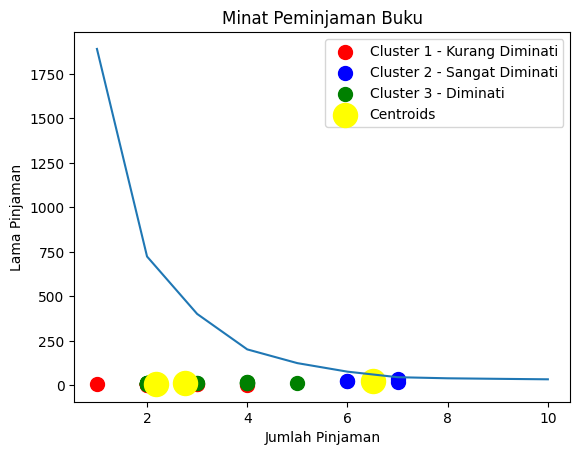

     Cluster    Books Summary
0  Cluster 1  Total books: 16
1  Cluster 2   Total books: 4
2  Cluster 3  Total books: 20
     Cluster                                              Books
0  Cluster 1  101 Kisah, 360 Days of Wonder, Atlas Sejarah N...
1  Cluster 2  Api Tauhid, Hujan, KeylanDara, Misan Catatan Amal
2  Cluster 3  500 Tanda Jawab Transaksi Syariah Sehari-hari,...


In [419]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [411]:
dataset = pd.read_csv('pinjaman_buku_2019.csv')

In [412]:
dataset.head()

,Judul Buku,Jumlah Pinjaman,Lama Pinjaman (Hari)
0,101 Kisah,2,6
1,360 Days of Wonder,1,6
2,500 Tanda Jawab Transaksi Syariah Sehari-hari,2,11
3,Api Tauhid,6,24
4,Atlas Sejarah Nabi Muhammad SAW,3,5


In [413]:
X = dataset.iloc[:,[1,2]].values

<function matplotlib.pyplot.show(close=None, block=None)>

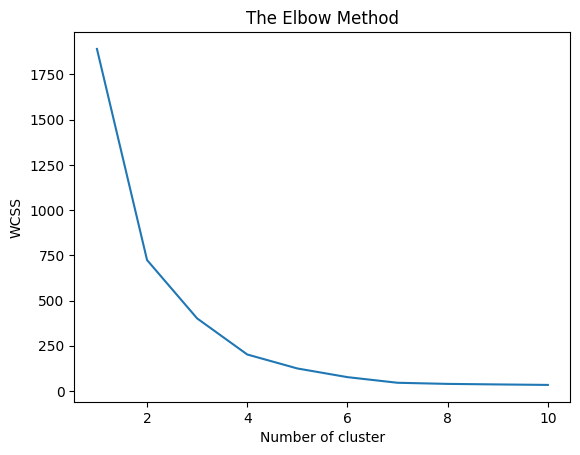

In [414]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)   
plt.title('The Elbow Method') 
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show

In [415]:
print(y_kmeans)

for cluster_num in range(3):
    # Filter dataset for each cluster
    cluster_books = dataset.loc[y_kmeans == cluster_num, 'Judul Buku'].tolist()
    # Append cluster information to the list
    cluster_data.append({'Cluster': f'Cluster {cluster_num + 1}', 'Books': ', '.join(cluster_books)})


[0 0 2 1 0 2 0 2 2 0 2 2 2 2 0 2 0 2 2 1 2 0 0 2 1 0 1 2 2 2 2 0 2 0 0 0 2
 0 2 0]


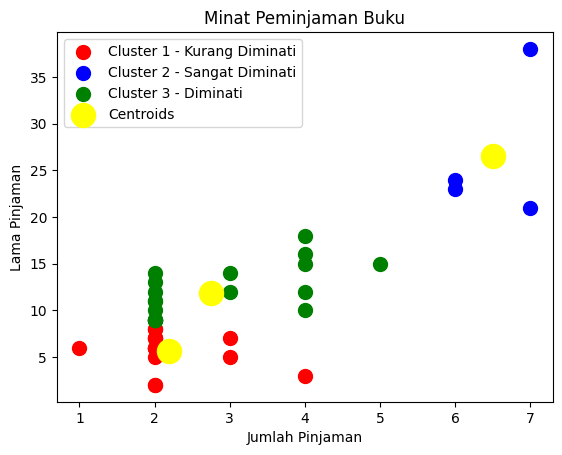

In [416]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

dataset['Cluster'] = y_kmeans

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1 - Kurang Diminati')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2 - Sangat Diminati')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3 - Diminati')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Minat Peminjaman Buku')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Lama Pinjaman')
plt.legend()
plt.show()

In [417]:
cluster_data = []

for cluster_num in range(3):
    cluster_books = dataset.loc[dataset['Cluster'] == cluster_num, 'Judul Buku'].tolist()
    books_summary = f"Total books: {len(cluster_books)}"
    cluster_data.append({'Cluster': f'Cluster {cluster_num + 1}', 'Books Summary': books_summary})

cluster_table = pd.DataFrame(cluster_data)
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
print(cluster_table)


     Cluster    Books Summary
0  Cluster 1  Total books: 16
1  Cluster 2   Total books: 4
2  Cluster 3  Total books: 20


In [418]:
cluster_data = []

for cluster_num in range(3):
    cluster_books = dataset.loc[dataset['Cluster'] == cluster_num, 'Judul Buku'].tolist()
    cluster_data.append({'Cluster': f'Cluster {cluster_num + 1}', 'Books': ', '.join(cluster_books)})

cluster_table = pd.DataFrame(cluster_data)
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
print(cluster_table)



     Cluster                                              Books
0  Cluster 1  101 Kisah, 360 Days of Wonder, Atlas Sejarah N...
1  Cluster 2  Api Tauhid, Hujan, KeylanDara, Misan Catatan Amal
2  Cluster 3  500 Tanda Jawab Transaksi Syariah Sehari-hari,...
